In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [3]:
from sklearn.cluster import KMeans

In [4]:
df=pd.read_csv("student_clustering.csv")

In [5]:
df

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110
...,...,...
195,4.68,89
196,8.57,118
197,5.85,112
198,6.23,108


In [6]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [7]:
df.isnull().sum()

cgpa    0
iq      0
dtype: int64

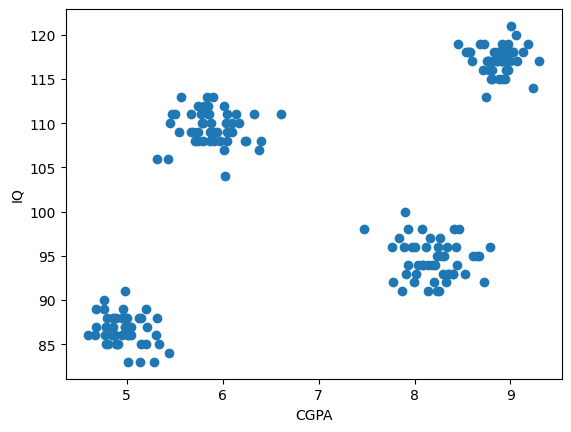

In [8]:
plt.scatter(df['cgpa'],df['iq'])
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(df)

StandardScaler()

In [13]:
scaled_data = scaler.transform(df)

In [14]:
scaled_data

array([[-1.14404869, -1.15364097],
       [-0.6687506 ,  0.9071682 ],
       [ 0.84973424, -0.74147914],
       [ 0.79417991, -0.41174967],
       [-0.94652221,  0.6598711 ],
       [-0.681096  ,  0.57743873],
       [ 0.88059775, -0.32931731],
       [ 1.12133315,  1.07203293],
       [-0.73665032,  0.6598711 ],
       [ 0.68307127, -0.65904677],
       [-1.47120193, -1.31850571],
       [-0.54529655,  0.6598711 ],
       [ 0.72628018, -0.41174967],
       [-1.22429383, -1.15364097],
       [-0.78603195,  0.49500636],
       [ 0.81887072, -0.57661441],
       [-0.9156587 ,  0.74230346],
       [ 0.54727181, -0.90634387],
       [-0.57616006,  0.74230346],
       [-0.70578681,  0.9071682 ],
       [ 0.30036371, -0.32931731],
       [-1.31071166, -1.31850571],
       [ 0.49171749, -0.82391151],
       [-1.36009328, -1.23607334],
       [-1.24898464, -1.15364097],
       [ 0.58430803, -0.32931731],
       [-1.31071166, -1.23607334],
       [ 1.35589585,  1.4017624 ],
       [ 0.65220775,

In [15]:
def find_best_clusters(df, maximum_K):
    clusters_centers = []
    k_values = []
    for k in range(2, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)

    return clusters_centers, k_values


In [16]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

C:\Users\Prathamesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Prathamesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Prathamesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Prathamesh\AppData\Local\Programs\Python\Python39\lib\site-packa

In [17]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

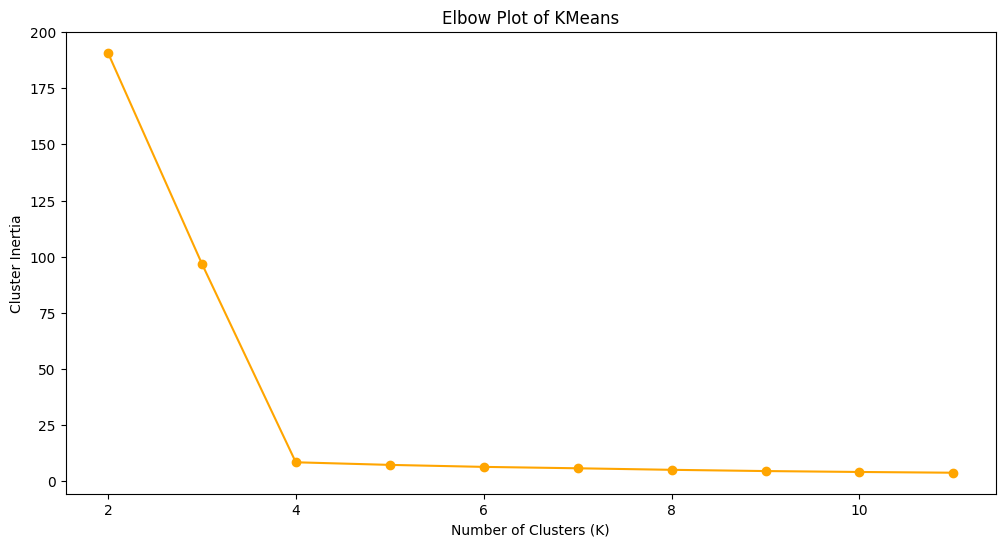

In [18]:
generate_elbow_plot(clusters_centers, k_values)

In [26]:
kmeans_model = KMeans(n_clusters = 4)

In [27]:
kmeans_model.fit(scaled_data)

C:\Users\Prathamesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [28]:
df["clusters"] = kmeans_model.labels_

In [29]:
df

,cgpa,iq,clusters
0,5.13,88,1
1,5.90,113,2
2,8.36,93,3
3,8.27,97,3
4,5.45,110,2
...,...,...,...
195,4.68,89,1
196,8.57,118,0
197,5.85,112,2
198,6.23,108,2


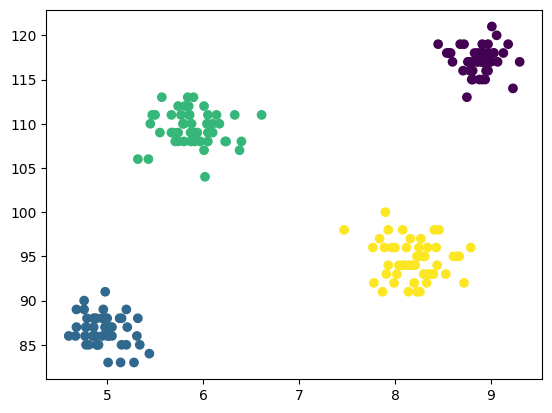

In [30]:
plt.scatter(df["cgpa"], 
            df["iq"], 
            c = df["clusters"]
            )